## Course Project

> Group Members
- Blessing Agyei Kyem
- Joshua Kofi Asamoah
- John Ashley

In [1]:
!nvidia-smi 

Tue Dec  3 11:07:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A10                     On  | 00000000:03:00.0 Off |                    0 |
|  0%   40C    P8              15W / 150W |      2MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%cd '/mmfs1/projects/armstrong.aboah/'            

/mmfs1/projects/armstrong.aboah


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/mmfs1/projects/armstrong.aboah


In [ ]:
!pip3 install -U ultralytics

## Custom Training

In [6]:
from ultralytics import settings

# View all settings
print(settings)

JSONDict("/mmfs1/home/blessing.agyeikyem/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/mmfs1/projects/armstrong.aboah/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "33d431963e0d6bd49d966adeb6d55c3ed697813da5b4690380d5692a1d99c558",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true
}


In [5]:
print(HOME)

/mmfs1/projects/armstrong.aboah


## Training of the YOLO model

In [7]:
%cd {HOME}

!yolo task=detect mode=train epochs=500 batch=32 plots=True project=course_project name=data_augmentation \
model=yolo11n.pt perspective=0.001 shear=60 translate=0.4 hsv_h=0.3 degrees=30 flipud=0.5 mixup=0.5 copy_paste=0.5 scale=0.6 cos_lr=True \
data=data.yaml

/mmfs1/projects/armstrong.aboah
Ultralytics 8.3.39 🚀 Python-3.9.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=course_project, name=data_augmentation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

In [6]:
!pwd

/mmfs1/projects/armstrong.aboah


## Validation

In [17]:
TRAINED_MODEL_PATH = 'course_project/baseline/weights/yolo11.pt'

In [10]:
!ls -ld runs/detect


drwxr-s---+ 9 joshua.asamoah x-ccast-prj-aaboah 512 Nov 27 10:06 runs/detect


In [13]:
!yolo val model={TRAINED_MODEL_PATH} data=data.yaml imgsz=640 batch=16 project=course_project/validation conf=0.25 exist_ok=True

Ultralytics 8.3.39 🚀 Python-3.9.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A10, 22724MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /mmfs1/projects/armstrong.aboah/datasets/labels/val... 1715 images
val: WARNING ⚠️ Cache directory /mmfs1/projects/armstrong.aboah/datasets/labels is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m/mmfs1/home/blessing.agyeikyem/.local/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1715       3779      0.464       0.28       0.36      0.217
    l

## Inference

In [23]:
test_data_path = 'datasets/images/test'

In [19]:
TRAINED_MODEL_PATH

'course_project/baseline/weights/yolo11.pt'

In [27]:
from ultralytics import YOLO
model = YOLO(TRAINED_MODEL_PATH)


results = model(test_data_path, exist_ok=True, project='course_project/prediction', save=True) 


image 1/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000028.jpg: 640x640 (no detections), 13.0ms
image 2/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000057.jpg: 640x640 (no detections), 13.9ms
image 3/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000078.jpg: 640x640 1 alligator crack, 2 potholes, 13.2ms
image 4/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000081.jpg: 640x640 (no detections), 17.3ms
image 5/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000088.jpg: 640x640 (no detections), 13.5ms
image 6/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000142.jpg: 640x640 (no detections), 13.3ms
image 7/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000157.jpg: 640x640 (no detections), 13.3ms
image 8/859 /mmfs1/projects/armstrong.aboah/datasets/images/test/India_000214.jpg: 640x640 1 transverse crack, 13.3ms
image 9/859 /mmfs1/projects/armstrong.aboah/datasets/images/te

## Convert model to Different formats

In [28]:
!yolo export model={TRAINED_MODEL_PATH} format=ncnn data=data.yaml half=True

Ultralytics 8.3.39 🚀 Python-3.9.12 torch-2.3.0+cu121 CPU (AMD EPYC 7662 64-Core Processor)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'course_project/baseline/weights/yolo11.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (5.2 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 2.8s, saved as 'course_project/baseline/weights/yolo11.torchscript' (10.4 MB)

NCNN: starting export with NCNN 1.0.20240820...
NCNN: running '/mmfs1/home/blessing.agyeikyem/.local/lib/python3.9/site-packages/ultralytics/pnnx course_project/baseline/weights/yolo11.torchscript ncnnparam=course_project/baseline/weights/yolo11_ncnn_model/model.ncnn.param ncnnbin=course_project/baseline/weights/yolo11_ncnn_model/model.ncnn.bin ncnnpy=course_project/baseline/weights/yolo11_ncnn_model/model_ncnn.py pnnxparam=course_project/baseline/weights/yolo11_ncnn_model/model.pnnx.param pnnxbin=course_p

In [23]:
from ultralytics import YOLO

model_ncnn = YOLO('course_project/baseline/weights/best_ncnn_model')

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [4]:
!ls {HOME}/runs/detect/train6/

args.yaml					  results.png
confusion_matrix_normalized.png			  train_batch0.jpg
confusion_matrix.png				  train_batch1.jpg
events.out.tfevents.1732704289.gpu0021.1543440.0  train_batch2.jpg
F1_curve.png					  val_batch0_labels.jpg
labels_correlogram.jpg				  val_batch0_pred.jpg
labels.jpg					  val_batch1_labels.jpg
P_curve.png					  val_batch1_pred.jpg
PR_curve.png					  val_batch2_labels.jpg
R_curve.png					  val_batch2_pred.jpg
results.csv					  weights


/mmfs1/projects/armstrong.aboah


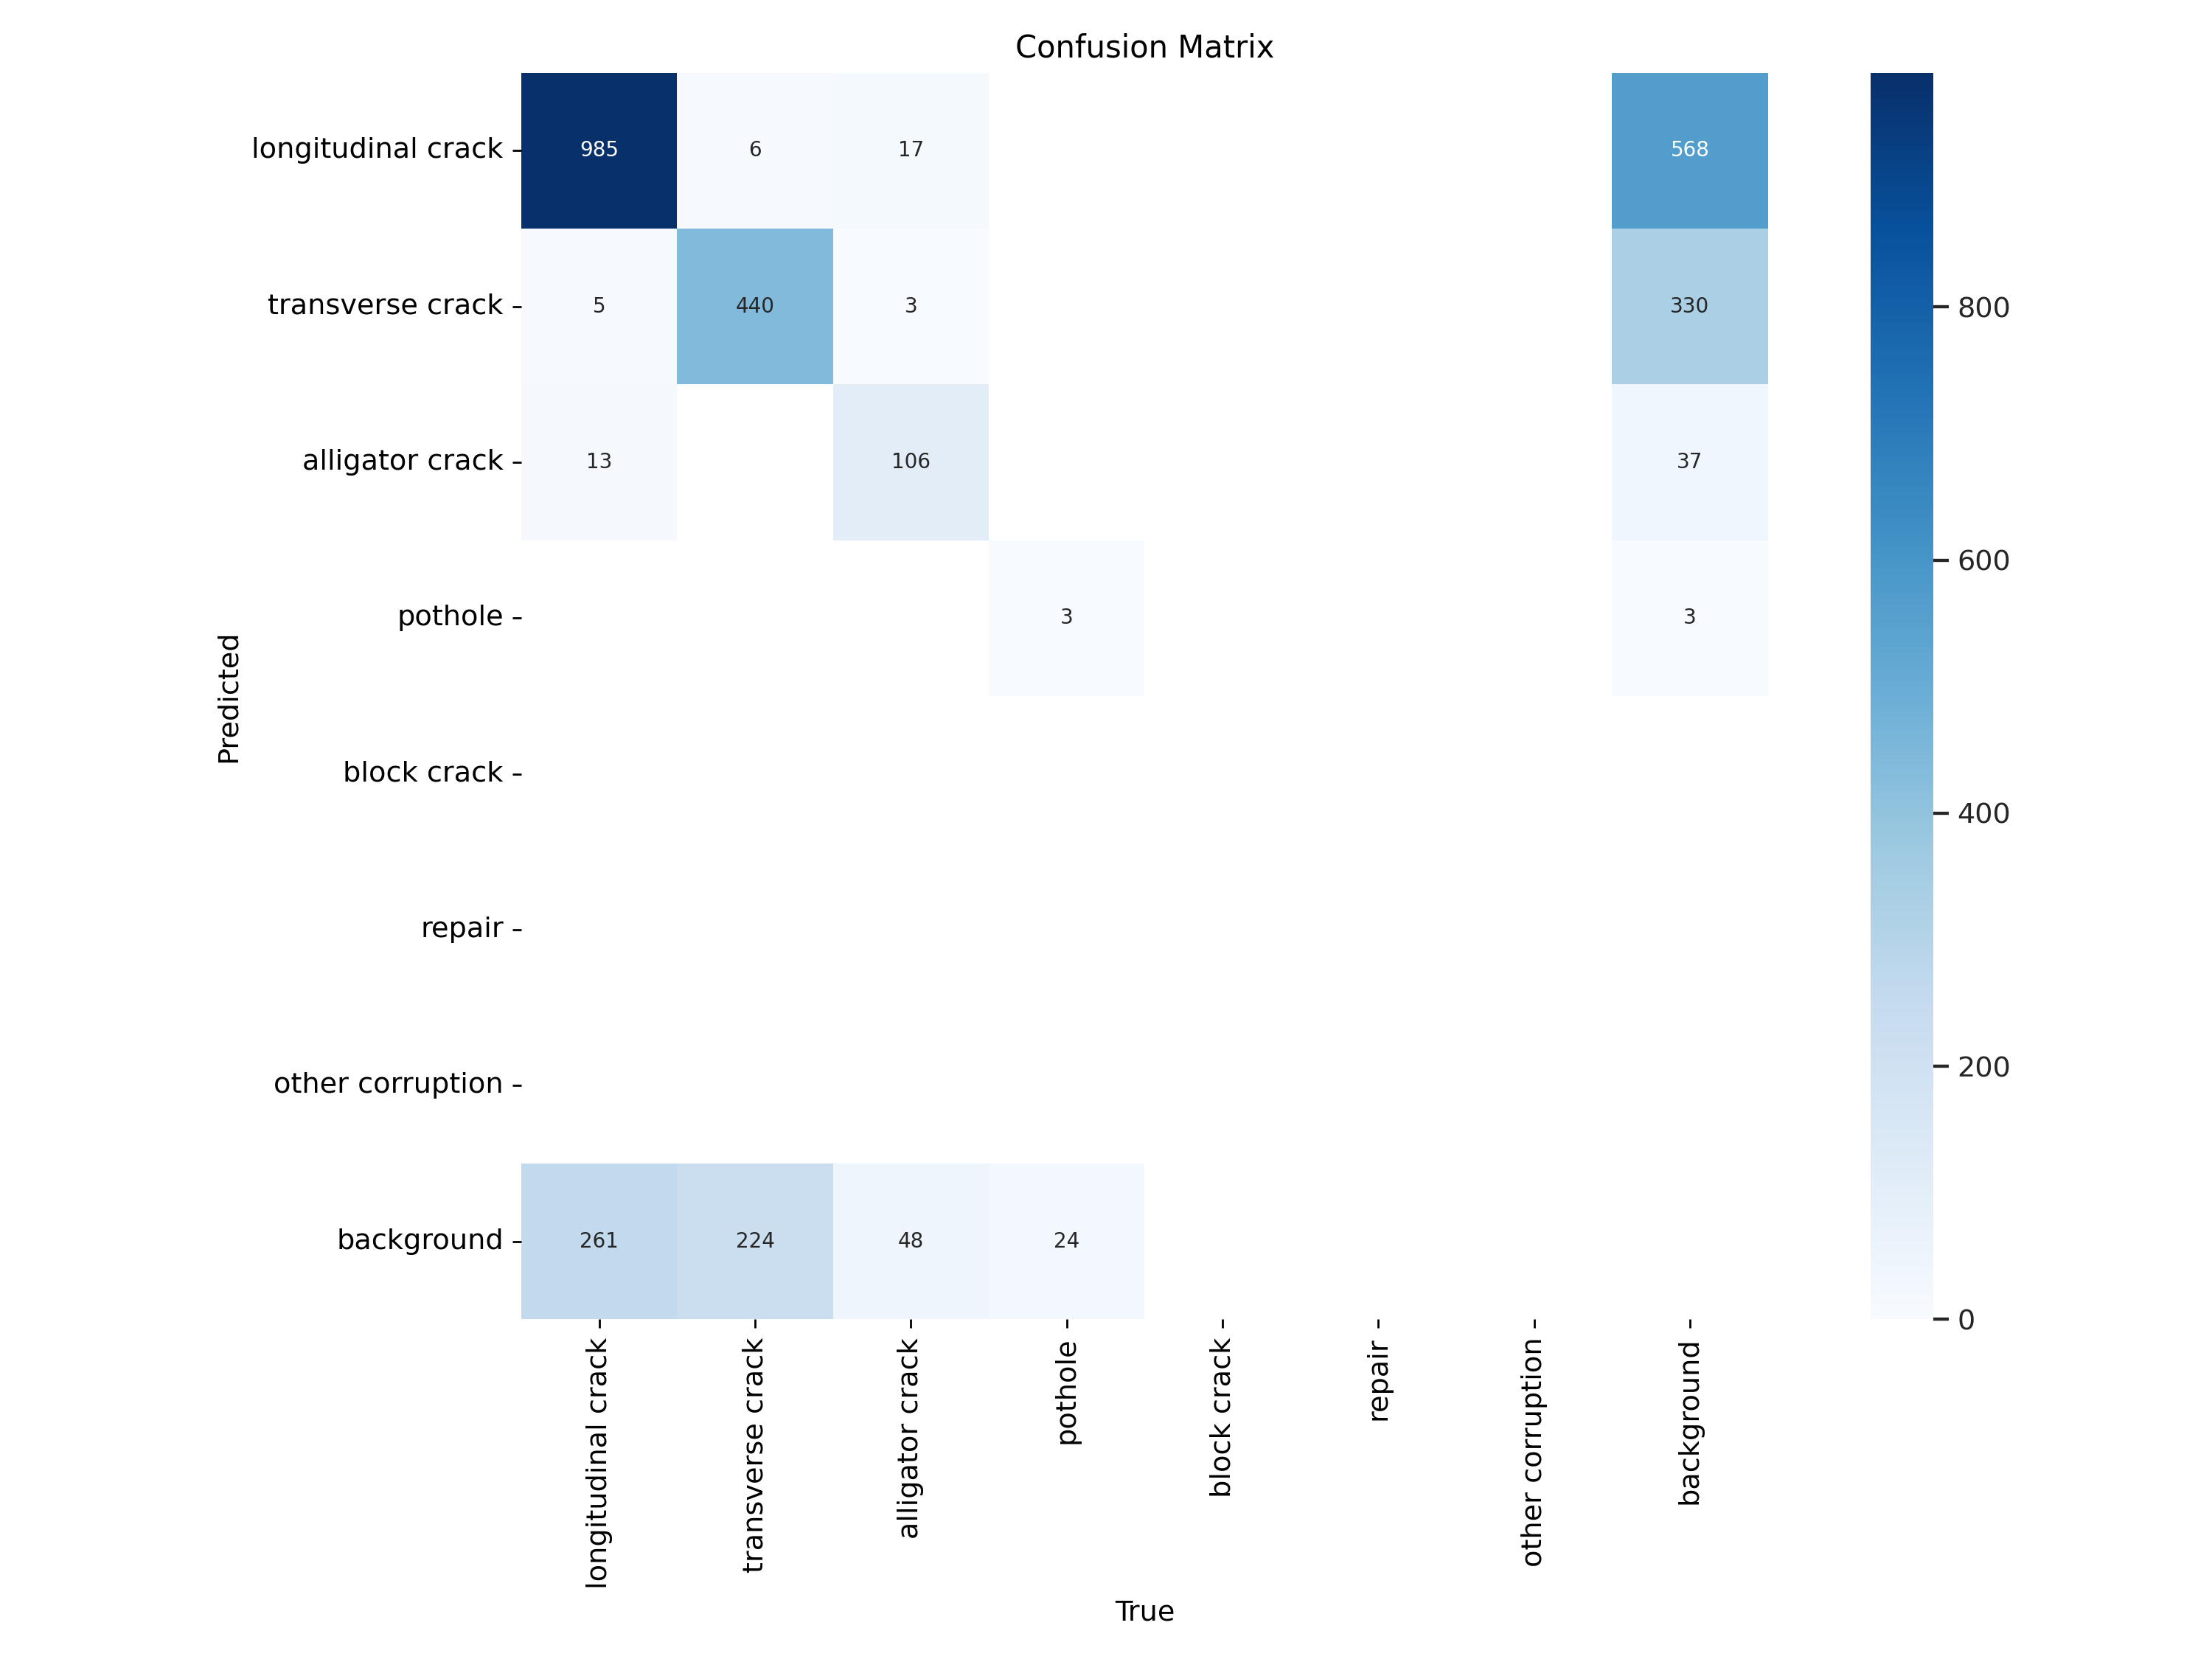

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/mmfs1/projects/armstrong.aboah


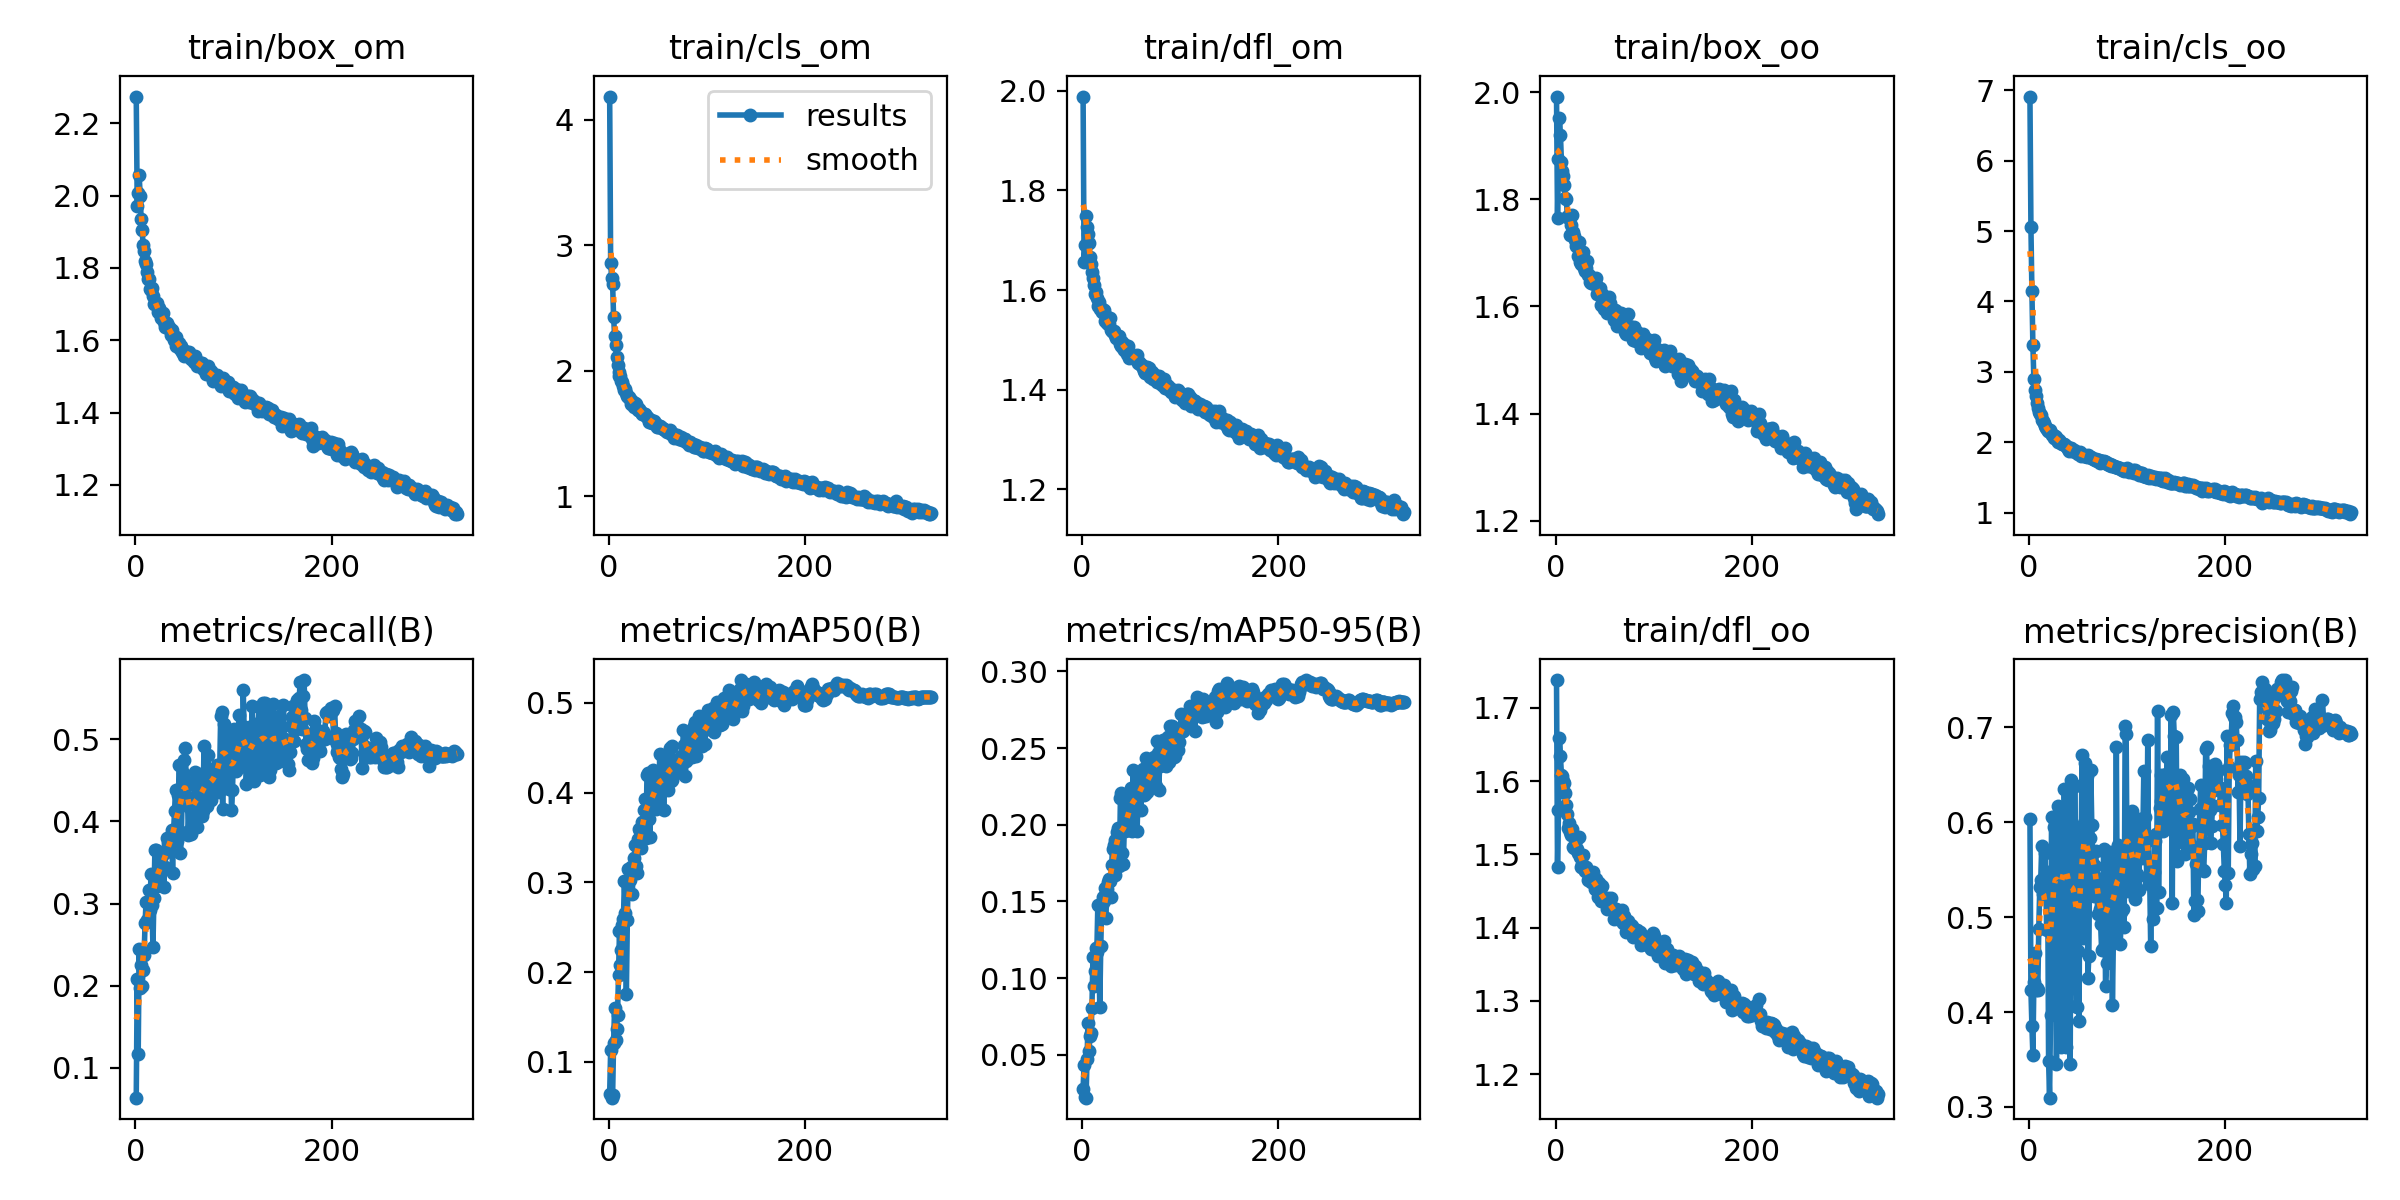

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [29]:
!pwd

/mmfs1/projects/armstrong.aboah


In [30]:
print(HOME)

/mmfs1/projects/armstrong.aboah


In [31]:
!ls

'1 (1).mp4'
 ARCHIVES
 camera_lidar_bag71.bag
'camera_lidar_bag72 1.bag'
 cars.mp4
 car_video.mp4
 COOOL_Competition
 DAT
 data
 Dataset
 datasets
 data.yaml
 detect
 FFTformer
 Fisheye8K_data
 Folds
 Ground_motion_simulation
 Multi-modal-models
 Multi-view-Pavement-Distress-Detection
 Pavement-datasets
 Pavement-distress-segmentation
 PCI
 pytorch_gpu.pbs
 PyTorch-YOLOv3
'result (1).mp4'
 RetroProject
 Retroreflectivity
 runs
 SAM
 Smart-Grid-Monitoring
 train33-20240703T181642Z-001.zip
 train-yolo11-object-detection-on-custom-dataset.ipynb
 ultralitics
 weights
 workzone_1.mp4
 Workzone_Data
 workzone_project
 Workzone_project
'Workzone Speed Estimation.mp4'
'workzone tracking.mp4'
 YOLO
 yolo11s.pt
 YOLOP
 yolov10m.pt
 yolov10n.pt
 yolov5
 YOLOv5-CBAM
 yolov8n.pt


In [5]:
import os
os.path.exists(f"{HOME}/datasets/images/test")

True

In [7]:
from ultralytics import YOLO

# Define the HOME directory

# Load a pretrained YOLO model
model = YOLO(f"{HOME}/runs/detect/train6/weights/yolov10.pt")

# Define the path to the test dataset
source = f"{HOME}/datasets/images/test"

# Run inference on the source and save results to a project
results = model.predict(source, save=True, project="Distresses", name="test_results")


image 1/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000000.jpg: 640x640 2 longitudinal cracks, 13.6ms
image 2/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000009.jpg: 640x640 2 longitudinal cracks, 15.7ms
image 3/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000017.jpg: 640x640 1 transverse crack, 15.0ms
image 4/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000021.jpg: 640x640 4 transverse cracks, 1 alligator crack, 14.0ms
image 5/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000027.jpg: 640x640 2 transverse cracks, 14.1ms
image 6/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000030.jpg: 640x640 1 transverse crack, 14.4ms
image 7/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000053.jpg: 640x640 2 longitudinal cracks, 14.2ms
image 8/481 /mmfs1/projects/armstrong.aboah/datasets/images/test/United_States_000054.j

In [8]:
total = 0
for p in model.parameters():
    total += p.numel()
total/1e6

2.697146

**NOTE:** Let's randomly select an image from our validation set and visualize the results.

In [19]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.


IndexError: list index out of range

## Deploy model on Roboflow

Once you have finished training your YOLOv10 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov10", model_path=f"{HOME}/runs/detect/train/")

While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference